In [1]:
import pandas as pd

Emails = pd.read_csv("SMSSpamCollection.csv", sep='\t', names=["Type", "Msg"]) 
Emails.head(8)

,Type,Msg
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...


In [2]:
print("Spam Emails =", len(Emails[Emails["Type"] == "spam"]["Msg"]))
print("Ham Emails =", len(Emails[Emails["Type"] == "ham"]["Msg"]))

dupNum = Emails.describe()["Msg"][0] - Emails.describe()["Msg"][1]
print("\nDuplicate values = ", dupNum)

Spam Emails = 747
Ham Emails = 4825

Duplicate values =  403


In [3]:
Emails.drop_duplicates(keep="first", inplace=True)
print("-- Duplicates removed --\n")

print("Spam Emails =", len(Emails[Emails["Type"] == "spam"]["Msg"]))
print("Ham Emails =", len(Emails[Emails["Type"] == "ham"]["Msg"]))

-- Duplicates removed --

Spam Emails = 653
Ham Emails = 4516


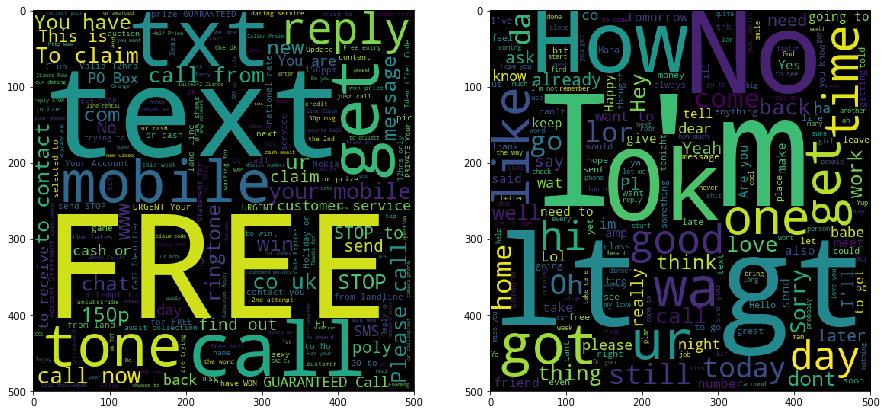

In [5]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

SpamWords = ' '.join(list(Emails[Emails["Type"] == "spam"]["Msg"]))
HamWords = ' '.join(list(Emails[Emails["Type"] == "ham"]["Msg"]))

Spamcloud = WordCloud(width = 500, height = 500,
                stopwords = stopwords.words('english')).generate(SpamWords) 
Hamcloud = WordCloud(width = 500, height = 500,
                stopwords = stopwords.words('english')).generate(HamWords)
 
_, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 8))
ax1.imshow(Spamcloud)
ax2.imshow(Hamcloud)

plt.show() 

In [6]:
from sklearn.preprocessing import LabelEncoder

x = Emails["Msg"]
y = LabelEncoder().fit_transform(Emails['Type'])
x.head(8)

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
5    FreeMsg Hey there darling it's been 3 week's n...
6    Even my brother is not like to speak with me. ...
7    As per your request 'Melle Melle (Oru Minnamin...
Name: Msg, dtype: object

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
x = cv.fit_transform(x).toarray()
x[0:5]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [9]:
from sklearn.naive_bayes import MultinomialNB

classifier = MultinomialNB()
classifier.fit(x_train,y_train)

y_pred = classifier.predict(x_test)
y_pred[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1])

In [10]:
from sklearn.metrics import confusion_matrix

print("Confusion Matrix\n")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix

[[1106   22]
 [  11  154]]


In [11]:
from sklearn.metrics import classification_report 

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1128
           1       0.88      0.93      0.90       165

    accuracy                           0.97      1293
   macro avg       0.93      0.96      0.94      1293
weighted avg       0.98      0.97      0.97      1293



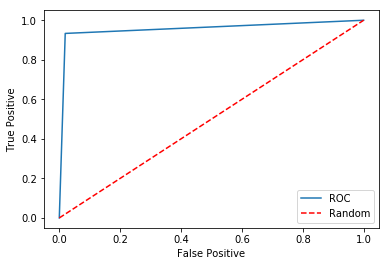

AUC = 0.9569148936170214


In [12]:
from sklearn.metrics import roc_curve, roc_auc_score

FP, TP, _ = roc_curve(y_test, y_pred)
plt.plot(FP, TP)
plt.plot(FP, FP, '--r')

plt.legend(['ROC', 'Random'])
plt.ylabel('True Positive')
plt.xlabel('False Positive')

plt.show()
print("AUC =", roc_auc_score(y_test, y_pred))

In [ ]:
import joblib

joblib.dump(classifier, 'MNBclassifier.pkl') 
joblib.dump(cv, 'CountVectorizer.pkl') 